In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = np.genfromtxt('/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/spektrum.csv', delimiter=',', filling_values=np.nan)
x = data[1:,0]
I = data[1:,1]
#x,I = np.loadtxt('/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/data/spectrum.txt', unpack = True)

#### Visualizing the data

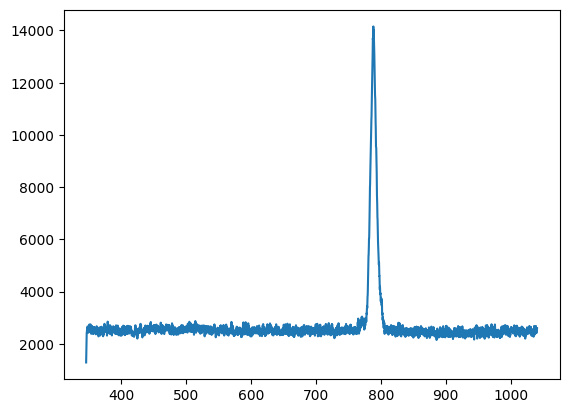

In [3]:
plt.plot(x,I)

#### Fitting the data

788.01
2189 15999.960391645713 788.01


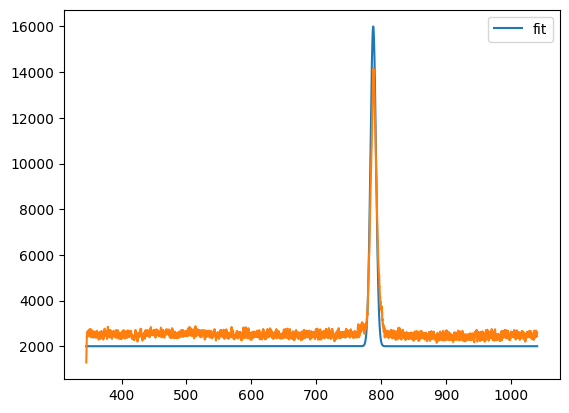

In [4]:
def gauss(x,A,w,T,O):
    return A*np.exp(-2*np.log(2)*((x-T)**2)/(w**2)) - O

#A,w,T,O = 4000, 10, 795, -1300
A,w,T,O = 14000, 7, 788, -2000
fitting_1 = gauss(x,A,w,T,O)
print(x[np.argmax(fitting_1)])
max_index = np.argmax(fitting_1)
print(max_index, fitting_1[max_index],x[max_index])


plt.plot(x,gauss(x,A,w,T,O), label="fit")
plt.plot(x,I)
plt.legend()

In [5]:
popt, _ = curve_fit(gauss, x, I, p0 = [14000, 7, 788, -2000])#[14000, 0.05e14, 3.8e14, -2000]) 100, 790
print(np.sqrt(np.diag(_)))
print(popt)
A,w,T,O = popt
y = gauss(x,A,w,T,O)

[2.69137734e+01 2.22999318e-02 1.33098223e-02 2.45896213e+00]
[ 1.08015057e+04  7.71836519e+00  7.88656283e+02 -2.50105520e+03]


bandwidth calculation

In [6]:

# T = lamda_0; peak position
print(T,np.sqrt(np.diag(_))[2])

# band = lamda_0
band = popt[2]*1e-9
banderr = np.sqrt(np.diag(_))[2]*1e-9

# dellam = delta lamda; FWHM
dellam = popt[1]*1e-9
dellam_err = np.sqrt(np.diag(_))[1]*1e-9

# b = delta v = (c/lamda_0^2)*del lamda ; bandwidth of the spectrum
b = 3e8*dellam/band**2
berr = b*np.sqrt( (banderr/band)**2 + (dellam_err/dellam)**2 )

print(b/1e11,berr/1e11)



788.6562834648457 0.013309822255245714
37.228114598614304 0.10756145386705827


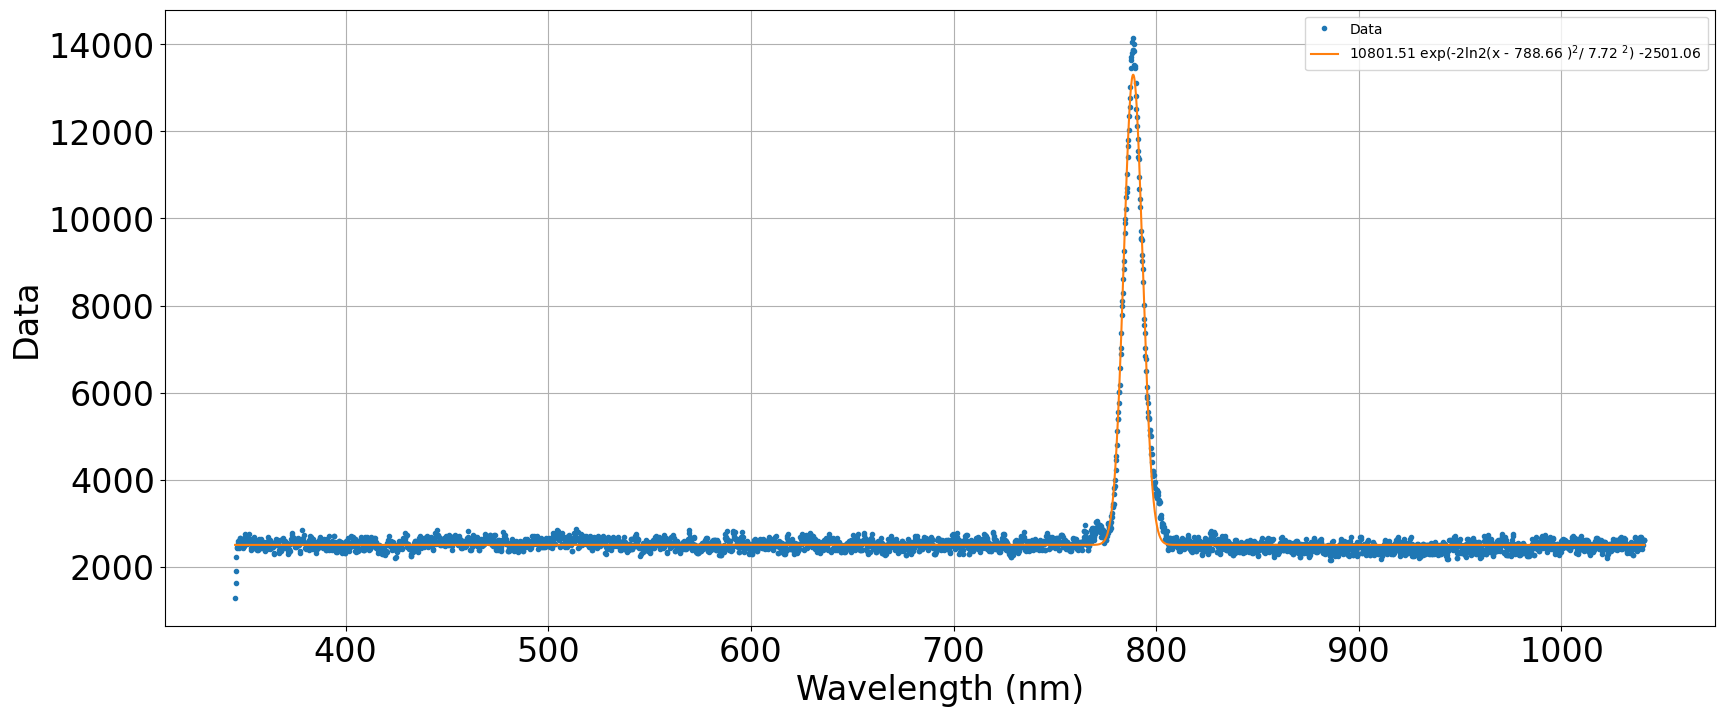

In [7]:
plt.figure(figsize = (20,8))
plt.grid(True)
plt.plot(x,I,'.',label = 'Data')
plt.plot(x,y,label = '%.2f exp(-2ln2(x - %.2f $)^2/$ %.2f $^2)$ %.2f'%(A,T,w,O))
plt.xlabel("Wavelength (nm)",fontsize=24)
plt.ylabel("Data",fontsize=24)
plt.xticks(fontsize=24)  # Set font size for x-axis ticks
plt.yticks(fontsize=24)  # Set font size for y-axis ticks
plt.legend(fontsize=24)  # Set font size for legend
plt.legend()
plt.savefig('spectrum_before_prism.jpg')

Function for pulse duration

In [8]:
def fwhm(pk, pkerr, Om, Omerr, w, werr):
    k = Om/(2*np.pi*pk)
    kerr = k*np.sqrt( (Omerr/Om)**2 + (pkerr/pk)**2 )
    print(k, kerr)
    T = w*k
    Terr = T*np.sqrt( (werr/w)**2 + (kerr/k)**2 )
    print(T, Terr)
    
    return T, Terr



PEak frequency calculation

In [9]:
print("lamda_0 = ", T)
Terr = np.sqrt(np.diag(_))[2]
print("lamda_0 error = ",Terr)

# peak frequency (omega prime)
tt = 3.0e8/(T*1e-9)
#print("peak frequency (omega) = ",tt)
#print('Error = ',tt*(Terr/(T)))
pk, pkerr = tt, tt*(Terr/T)
print("peak frequency (omega prime) = ",pk/1e14,'+/-',pkerr/1e14)

lamda_0 =  788.6562834648457
lamda_0 error =  0.013309822255245714
peak frequency (omega prime) =  3.803938500077549 +/- 6.419747913943423e-05


Pulse duration calculation

In [10]:
# from "IA_vor" file, Omb = omega
Omb, Omberr = 211032.66149406132, 3.64748544e-01
# wb = w
wb, wberr = 0.001512399634573382, 2.99333572e-06

# Tb = The duration of the pulse
# Tb = w*(1/2 pi)*(omega/omega_prime)
Tb, Terrb = fwhm(pk, pkerr, Omb, Omberr, wb, wberr)
print("The duration of the pulse",Tb/1e-15, Terrb/1e-15)

8.829504270359214e-11 1.4979127750342003e-15
1.335373903195539e-13 2.643064142672727e-16
The duration of the pulse 133.5373903195539 0.2643064142672727


Pulse duration calculation after prism

In [11]:
# from "IA_nach" file, Omb = omega
Oma, Omaerr = 215742.50418021274, 5.66078081e-01
# wb = w
wa, waerr = 0.0011801555258520986, 1.16606531e-06

# Tb = The duration of the pulse
# Tb = w*(1/2 pi)*(omega/omega_prime)
Ta, Terra = fwhm(pk, pkerr, Oma, Omaerr, wa, waerr)
print(Ta/1e-15, Terra/1e-15)


9.026561805508883e-11 1.5416766460599197e-15
1.0652746794216804e-13 1.052713296959659e-16
106.52746794216803 0.10527132969596589


In [12]:
k = 2.13935781e+05
w0 = 0.00117971
print(w*k/tt)
print("time-bandwidth product (before)",Tb*b)
print("time-bandwidth product (after)",Ta*b)

4.340854839526563e-09
time-bandwidth product (before) 0.4971345270016241
time-bandwidth product (after) 0.3965816784451243
